In [2]:
'''
Plot 1D and 2D distribution of relevant variables to investigate correlations

'''

import awkward as ak
import uproot
import numpy as np
from scipy.optimize import curve_fit


import sys
import datetime
import numpy as np
import pandas as pd
import csv
import os
import subprocess
import ROOT as rt
import itertools


REPO_BASE_PATH = subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')
plot_path = f"{REPO_BASE_PATH}/plots/ADR/time_resolution_202503/"
os.makedirs(plot_path, exist_ok=True)

sys.path.append(REPO_BASE_PATH + "/lib")
from histo_utilities import *

import tdrstyle
a = tdrstyle.setTDRStyle()

Welcome to JupyROOT 6.30/02


In [3]:
files = {}
files_raw = {}
tree = {}
tree_raw = {}
# Open the input ROOT file
voltages = np.round([0.180],3)
biases = [4,1,2] #slot number of voltage source
pixels = [1,2,3] # pixel number in SNSPD
scope_ch = [2,3,4] # channel on scope


inputDirBase = "root://cmseos.fnal.gov///eos/uscms/store/user/christiw/SNSPD_data/ADR_time_resolution_202503/"
tempToDir = {
# 0.2: "20250311_0p2K",
0.5: "20250310_0p5K",
# 0.8: "20250309_0p8K",
# 1:"20250310_1p0K",

 }

# 0.5_B2_P3_0p18
for k, path in tempToDir.items():
    inputDir = f"{inputDirBase}/{path}/reco/v2/"
    for ch_i, bias_ch in enumerate(biases): # loop over pixels
        name = f"B{bias_ch}_P{pixels[ch_i]}"
        for j, v in enumerate(voltages): # loop over voltages  
            bv_string = str(voltages[j]).replace(".","p")
            files[f'{k}_{name}_{bv_string}'] = inputDir+f'output_run{name}_BV{bv_string}.root'
            
for k, v in files.items():
    if not os.path.exists(v[v.find("/eos"):]): 
        print("FILE NOT FOUND", v)
        continue
#     else: print(v)
    tree[k] = uproot.open(v)["pulse"]


In [10]:
time = {}
rise_time = {}
amplitude = {}
time_nofit = {}
time_50mV_nofit = {}
baseline_rms = {}
time_50mV = {}
s2n = {}
intercept = {}
slope = {}
for k, T in tree.items():
    amplitude[k] = T['amplitude'].array()
    rise_time[k] = T['rise_time'].array()
    intercept[k] = T['intercept'].array()
    slope[k] = T['slope'].array()
    
    time[k] = T['time'].array()
    time_nofit[k] = T['time_nofit'].array()
    time_50mV_nofit[k] = T['time_50mV_nofit'].array()
#     time_50mV[k] = T['time_50mV'].array()
    baseline_rms[k] = T['baseline_rms'].array()
    s2n[k] = amplitude[k]/baseline_rms[k]
    
    amp_threshold = 0.5 * np.array([np.mean(amplitude[k][:,0][amplitude[k][:,0]>-999]), np.mean(amplitude[k][:,1][amplitude[k][:,1]>-999])])
    time_50mV[k] = (amp_threshold/amplitude[k] - intercept[k]) / slope[k]
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


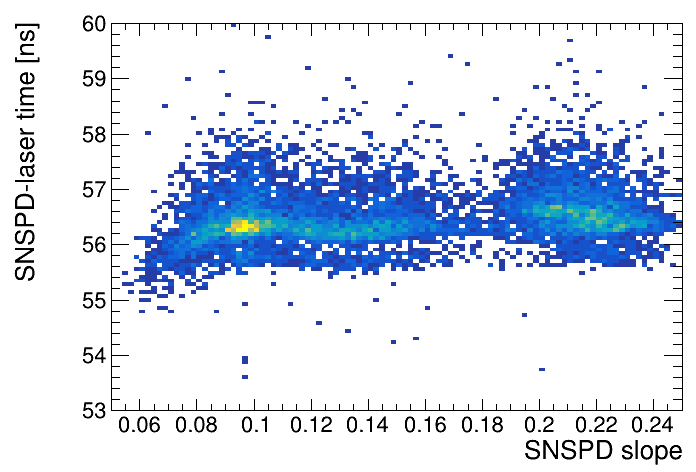

In [34]:
# plot DCR for different channels in one canvas


c = rt.TCanvas("c1","gerrors2",200,10,700,500);
h = {}
leg = rt.TLegend(0.25,0.65,0.40,0.85)
leg.SetTextSize(0.05)
leg.SetTextFont(42)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
leg.SetFillColor(0)


for k in tree.keys():
    if not "P3" in k:continue
#     if not "0.2_B4_P1_0p16" in k:continue
        
    h[k] = create_TH2D(np.column_stack((slope[k][:,1], time[k][:,1]-time[k][:,0],)), \
                       axis_title = ['SNSPD slope','SNSPD-laser time [ns]','Events'], binning = [100,0.05,0.25, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((slope[k][:,0], time[k][:,1]-time[k][:,0],)), \
#                         axis_title = ['laser slope','SNSPD-laser time [ns]','Events'], binning = [100,0.6,1, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((intercept[k][:,0], time[k][:,1]-time[k][:,0],)), \
#                         axis_title = ['laser intercept','SNSPD-laser time [ns]','Events'], binning = [100,40,60, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((slope[k][:,1], rise_time[k][:,1],)), \
#                        axis_title = ['SNSPD slope','SNSPD rise time [ns]','Events'], binning = [100,0.0,0.4, 100,0,10])
#     h[k] = create_TH2D(np.column_stack((rise_time[k][:,1], time[k][:,1]-time[k][:,0],)), \
#                        axis_title = ['SNSPD rise time [ns]','SNSPD-laser time [ns]','Events'], binning = [100,2,8, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((intercept[k][:,1], time[k][:,1]-time[k][:,0],)), \
#                        axis_title = ['SNSPD intercept','SNSPD-laser time [ns]','Events'], binning = [50,0.3,0.7, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((amplitude[k][:,1], time[k][:,1]-time[k][:,0],)), \
#                        axis_title = ['SNSPD amplitude','SNSPD-laser time [ns]','Events'], binning = [50,0.08,0.2, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((slope[k][:,1], time_nofit[k][:,1]-time_nofit[k][:,0],)), \
#                        axis_title = ['SNSPD slope','SNSPD-laser time nofit [ns]','Events'], binning = [100,0.05,0.25, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((rise_time[k][:,1], time_nofit[k][:,1]-time_nofit[k][:,0],)), \
#                        axis_title = ['SNSPD rise time [ns]','SNSPD-laser time nofit [ns]','Events'], binning = [100,2,8, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((intercept[k][:,1], time_nofit[k][:,1]-time_nofit[k][:,0],)), \
#                        axis_title = ['SNSPD intercept','SNSPD-laser time nofit [ns]','Events'], binning = [50,0.4,0.7, 100,53,60])

#     h[k] = create_TH2D(np.column_stack((time[k][:,1]-time[k][:,0], time_nofit[k][:,1]-time_nofit[k][:,0],)), \
#                        axis_title = ['SNSPD-laser time [ns]','SNSPD-laser time nofit [ns]','Events'], binning = [ 100,53,60, 100,53,60])
#     h[k] = create_TH2D(np.column_stack((time[k][:,1],time[k][:,0],)), \
#                        axis_title = ['SNSPD time [ns]','laser time [ns]','Events'], binning = [50,-2,2, 100,-60,-53])
#     h[k] = create_TH2D(np.column_stack((time_nofit[k][:,1],time[k][:,0],)), \
#                        axis_title = ['SNSPD time [ns]','laser time [ns]','Events'], binning = [50,-2,2, 100,-60,-53])

for i, k in enumerate(h.keys()):
    h[k].SetLineColor(std_color_list[i])
    h[k].SetMarkerColor(std_color_list[i])
    h[k].SetMarkerSize(0.9)
    h[k].SetMarkerStyle(8)
    h[k].SetTitle('')


    leg.AddEntry(h[k],k)
    h[k].Draw('hist')


c.Draw()


56.425 56.17850976950364 57.90394138297812
56.275 56.02836107955289 57.75483352268266
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      53.7447
NDf                       =           30
Edm                       =  6.28237e-08
NCalls                    =          170
p0                        =    0.0457192   +/-   0.00124025  
p1                        =      56.1761   +/-   0.013841    
p2                        =     0.117405   +/-   0.0141523   
p3                        =      2.19864   +/-   0.0419219   
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      45.6612
NDf                       =           30
Edm                       =  4.75618e-08
NCalls                    =          146
p0                        =    0.0441281   +/-   0.000508207 
p1                        =      56.1474   +/-   0.00379743  
p2                        =     0.100641   +/-   0.00525987  
p3        

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


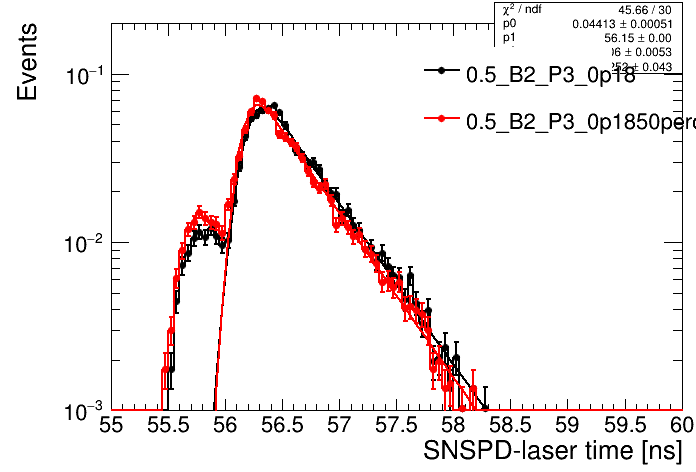

In [24]:
# plot DCR for different channels in one canvas


c = rt.TCanvas("c2","c2",200,10,700,500);
h = {}
gaus = {}
leg = rt.TLegend(0.6,0.7,0.88,0.9)
leg.SetTextSize(0.05)
leg.SetTextFont(42)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
leg.SetFillColor(0)
# if not "0p2" in temp:continue

for i, k in enumerate(tree.keys()):
#     if not i == 0:continue
    if not "0.5" in k:continue
    if not "P3" in k:continue
#     if  "0p155" in k:continue
    if not "5_B2_P3_0p18" in k:continue
    if not ("0p14" in k or "0p16" in k or "0p18" in k or "0p2" in k ):continue


    cond = (time[k][:,0]>-999) 

#     h[k] = create_TH1D((time_nofit[k][:,1]-time_nofit[k][:,0]), axis_title = ['SNSPD-laser time [ns]','Events'], binning = [100,54,60])
#     h[k] = create_TH1D((time[k][:,1]-time[k][:,0]), axis_title = ['SNSPD-laser time [ns]','Events'], binning = [100,54,60])
#     h[k] = create_TH1D((time_50mV[k][:,1]), axis_title = ['SNSPD-laser time [ns]','Events'], binning = [100,50,60])
#     h[k] = create_TH1D((amplitude[k][:,1]), axis_title = ['amplitude [V]','Events'], binning = [100,0,0.3])
#     h[k] = create_TH1D((amplitude[k][:,0]), axis_title = ['laser amplitude [V]','Events'], binning = [100,0,5])
    
    
    bins = [100,55,60]

    h[k] = create_TH1D((time_50mV[k][:,1]-time_50mV[k][:,0])[cond], axis_title = ['SNSPD-laser time [ns]','Events'], binning = bins)
    h[k +"50perc"] = create_TH1D((time[k][:,1]-time[k][:,0])[cond], axis_title = ['SNSPD-laser time [ns]','Events'], binning = bins)

    

    
for i, k in enumerate(h.keys()):
    emg = EMG()
    h[k].Scale(1./h[k].Integral())
    fit, fit_err, gaus[k] = fit_emg(h[k], emg)
#     fit, fit_err, gaus[k] = fit_gaus(h[k])

    
hist_max = 0
for i, k in enumerate(h.keys()):
    

    h[k].SetLineColor(std_color_list[i])
    h[k].SetMarkerColor(std_color_list[i])
    h[k].SetMarkerSize(0.9)
    h[k].SetMarkerStyle(8)
    h[k].SetTitle('')

    hist_max = max(hist_max, h[k].GetBinContent(h[k].GetMaximumBin()))
    h[k].SetMaximum(0.2)
    h[k].SetMinimum(0.001)
    leg.AddEntry(h[k],k)

    h[k].Draw('hist E1 same')
    gaus[k].SetLineWidth(2)
    gaus[k].SetLineColor(std_color_list[i])
    gaus[k].Draw("same")


leg.Draw()
c.SetLogy()


c.Draw()
